In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/Student_500.csv')

numerical_columns = ['Age', 'Math_Score', 'Science_Score', 'English_Score', 'Attendance_Rate', 'CGPA']

stats_summary = {}
for column in numerical_columns:
    stats_summary[column] = {
        'Mean': df[column].mean(),
        'Median': df[column].median(),
        'Mode': df[column].mode().values.tolist(),
        'Standard Deviation': df[column].std(),
        'Skewness': df[column].skew(),
        'Kurtosis': df[column].kurt()
    }

summary_df = pd.DataFrame(stats_summary).T
print(summary_df)




                     Mean Median                         Mode  \
Age                20.956   21.0                         [22]   
Math_Score         64.708   64.5                         [59]   
Science_Score       68.22   68.0                         [67]   
English_Score      70.064   70.0                         [68]   
Attendance_Rate  80.08524  79.73  [69.68, 71.3, 80.02, 99.25]   
CGPA              6.76622   6.73                       [6.93]   

                Standard Deviation  Skewness  Kurtosis  
Age                       2.000517  0.001923 -1.237619  
Math_Score                9.963799  0.121476 -0.154224  
Science_Score            12.004825 -0.074657 -0.103641  
English_Score             7.824983 -0.030952 -0.001997  
Attendance_Rate          11.742626  0.008818 -1.193677  
CGPA                       0.57826  0.035926  0.019786  


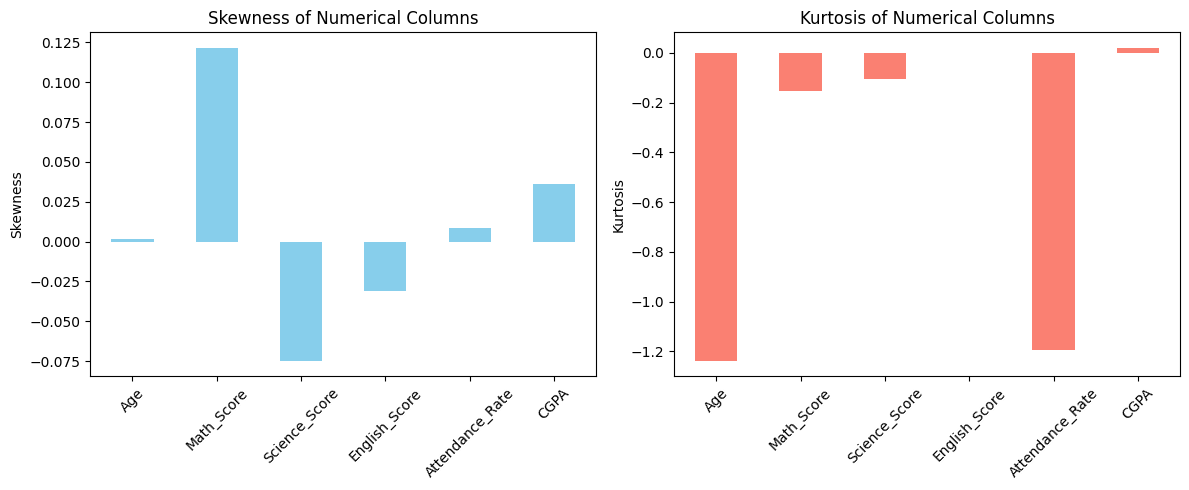

In [3]:
import matplotlib.pyplot as plt

skewness = summary_df['Skewness']
kurtosis = summary_df['Kurtosis']

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
skewness.plot(kind='bar', color='skyblue')
plt.title('Skewness of Numerical Columns')
plt.ylabel('Skewness')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
kurtosis.plot(kind='bar', color='salmon')
plt.title('Kurtosis of Numerical Columns')
plt.ylabel('Kurtosis')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


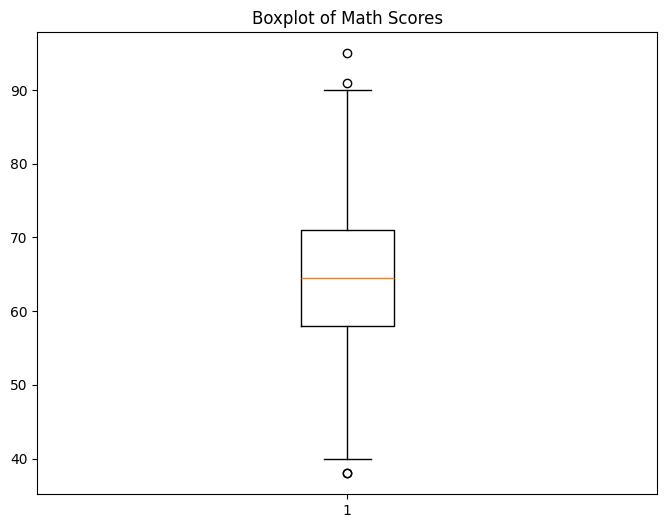

In [4]:

percentiles = np.percentile(df['Math_Score'], [10, 25, 50, 75, 90])

deciles = {
    'Q1(25%)': percentiles[1],
    'Q2(50%) - Median': percentiles[2],
    'Q3(75%)': percentiles[3],
}

Q1 = percentiles[1]
Q3 = percentiles[3]
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

plt.figure(figsize=(8,6))
plt.boxplot(df['Math_Score'], vert=True)
plt.title('Boxplot of Math Scores')
plt.show()


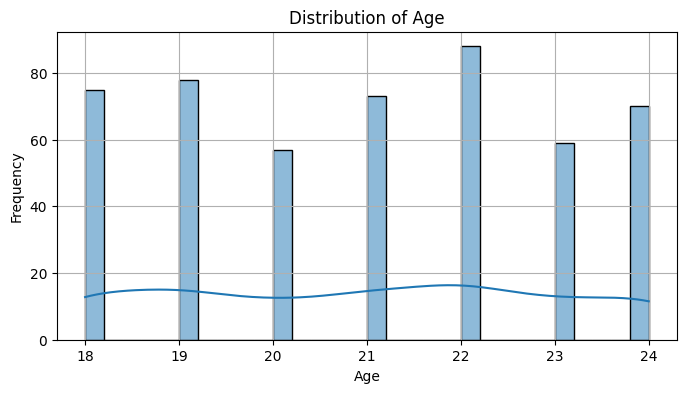

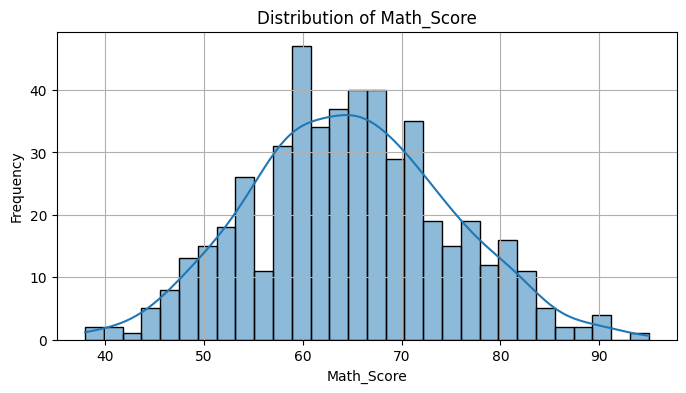

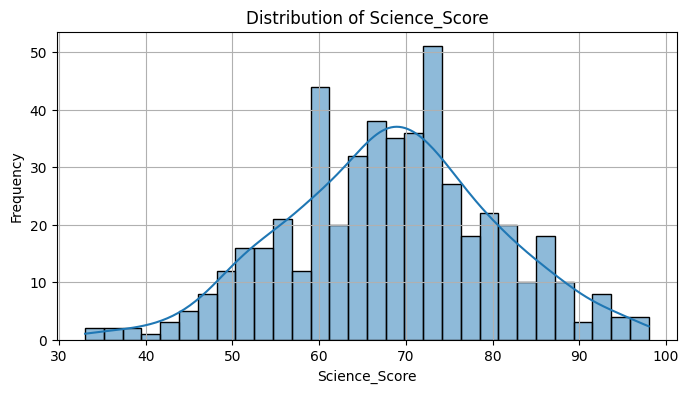

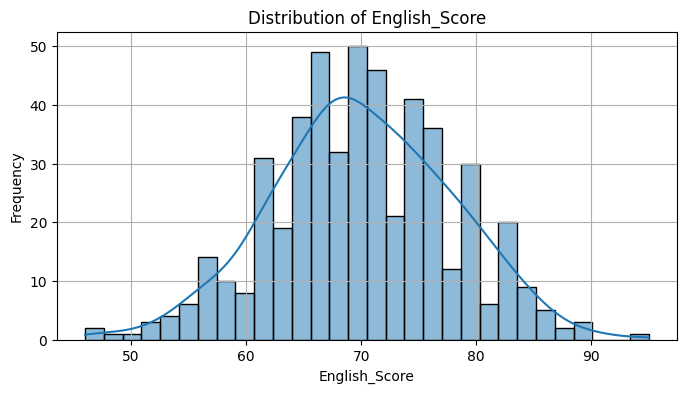

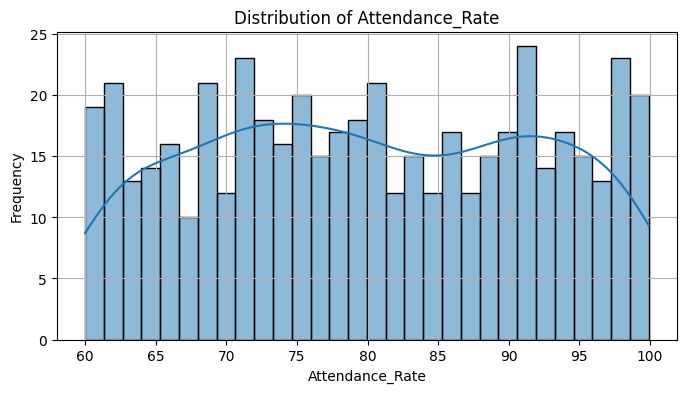

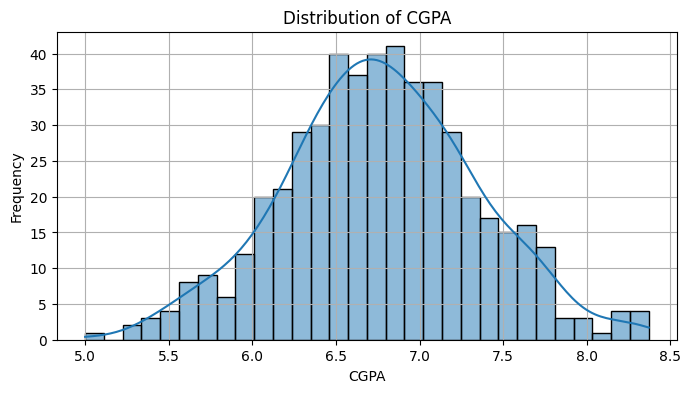

In [5]:
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

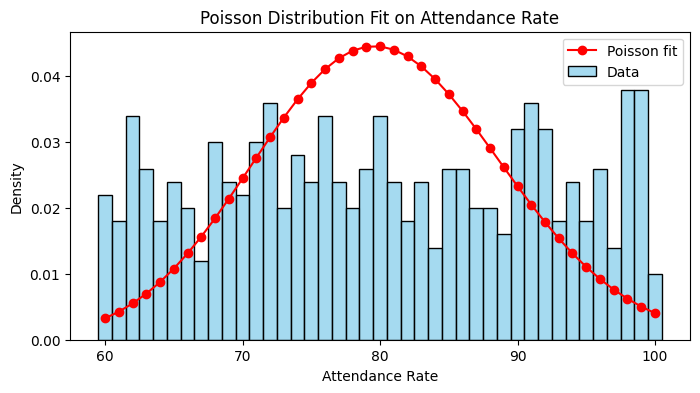

In [6]:
from scipy.stats import poisson

data = df['Attendance_Rate'].round().astype(int)

plt.figure(figsize=(8, 4))
sns.histplot(data, bins=range(data.min(), data.max() + 2), stat='density', discrete=True, color='skyblue', label='Data')

lambda_poisson = data.mean()
x = np.arange(data.min(), data.max() + 1)
poisson_pmf = poisson.pmf(x, mu=lambda_poisson)
plt.plot(x, poisson_pmf, 'o-', color='red', label='Poisson fit')

plt.title('Poisson Distribution Fit on Attendance Rate')
plt.xlabel('Attendance Rate')
plt.ylabel('Density')
plt.legend()
plt.show()


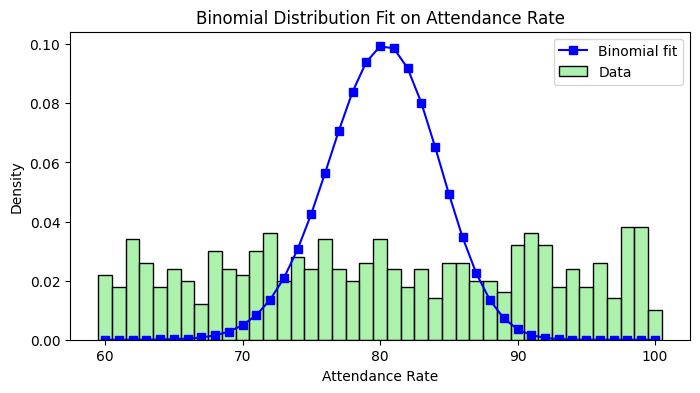

In [7]:
from scipy.stats import binom

data = df['Attendance_Rate'].round().astype(int)

plt.figure(figsize=(8, 4))
sns.histplot(data, bins=range(data.min(), data.max() + 2), stat='density', discrete=True, color='lightgreen', label='Data')

n_binom = data.max()
p_binom = data.mean() / n_binom if n_binom != 0 else 0
x = np.arange(data.min(), data.max() + 1)
binom_pmf = binom.pmf(x, n=n_binom, p=p_binom)
plt.plot(x, binom_pmf, 's-', color='blue', label='Binomial fit')

plt.title('Binomial Distribution Fit on Attendance Rate')
plt.xlabel('Attendance Rate')
plt.ylabel('Density')
plt.legend()
plt.show()


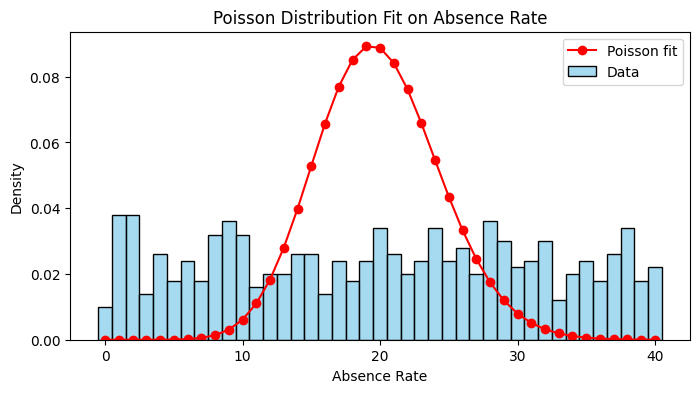

In [8]:
df['Absence_Rate'] = 100 - df['Attendance_Rate']
data = df['Absence_Rate'].round().astype(int)

from scipy.stats import poisson, binom
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(8, 4))
sns.histplot(data, bins=range(data.min(), data.max() + 2), stat='density', discrete=True, color='skyblue', label='Data')
lambda_poisson = data.mean()
x = np.arange(data.min(), data.max() + 1)
poisson_pmf = poisson.pmf(x, mu=lambda_poisson)
plt.plot(x, poisson_pmf, 'o-', color='red', label='Poisson fit')
plt.title('Poisson Distribution Fit on Absence Rate')
plt.xlabel('Absence Rate')
plt.ylabel('Density')
plt.legend()
plt.show()


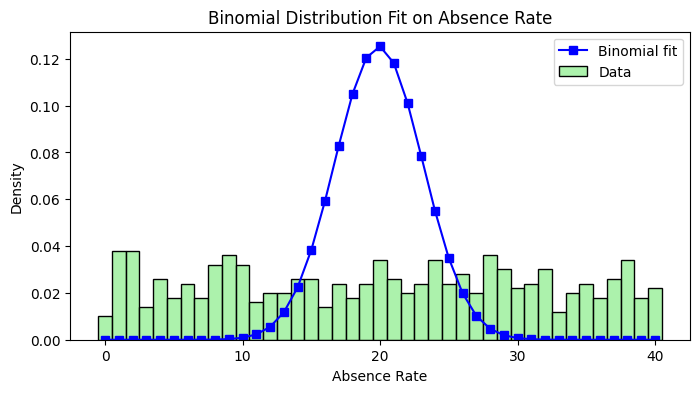

In [9]:

plt.figure(figsize=(8, 4))
sns.histplot(data, bins=range(data.min(), data.max() + 2), stat='density', discrete=True, color='lightgreen', label='Data')
n_binom = data.max()
p_binom = data.mean() / n_binom if n_binom != 0 else 0
x = np.arange(data.min(), data.max() + 1)
binom_pmf = binom.pmf(x, n=n_binom, p=p_binom)
plt.plot(x, binom_pmf, 's-', color='blue', label='Binomial fit')
plt.title('Binomial Distribution Fit on Absence Rate')
plt.xlabel('Absence Rate')
plt.ylabel('Density')
plt.legend()
plt.show()


In [11]:
threshold = 70

p_male = len(df[df['Gender'] == 'Male']) / len(df)
p_female = len(df[df['Gender'] == 'Female']) / len(df)

p_high_given_male = len(df[(df['Gender'] == 'Male') & (df['Math_Score'] >= threshold)]) / len(df[df['Gender'] == 'Male'])
p_high_given_female = len(df[(df['Gender'] == 'Female') & (df['Math_Score'] >= threshold)]) / len(df[df['Gender'] == 'Female'])

p_high_score = len(df[df['Math_Score'] >= threshold]) / len(df)

p_male_given_high = (p_high_given_male * p_male) / p_high_score
p_female_given_high = (p_high_given_female * p_female) / p_high_score

result = pd.DataFrame({
    'Gender': ['Male', 'Female'],
    'P(Gender)': [p_male, p_female],
    'P(High Score | Gender)': [p_high_given_male, p_high_given_female],
    'P(Gender | High Score)': [p_male_given_high, p_female_given_high]
})

print(result)


   Gender  P(Gender)  P(High Score | Gender)  P(Gender | High Score)
0    Male      0.488                0.307377                0.477707
1  Female      0.512                0.320312                0.522293


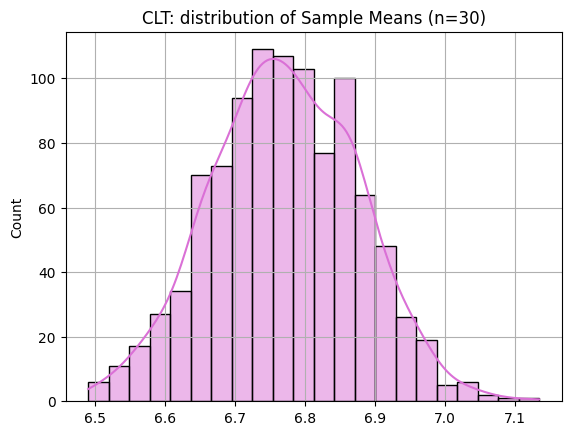

In [14]:
sample_means = [df['CGPA'].sample(n=30, replace=True).mean() for _ in range(1000)]
sns.histplot(sample_means, kde=True, color='orchid')
plt.title("CLT: distribution of Sample Means (n=30)")
plt.grid(True)
plt.show()


In [19]:
sample_random_sample=df.sample(frac=0.2,random_state=1)
stratified_sample=df.groupby('Gender',group_keys=False).apply(lambda x: x.sample(frac=0.2,random_state=1))
systematic_sample=df.iloc[::10]

pd.DataFrame({
    'Method': ['Simple Random','Stratified','Systematic'],
    'sample_Size': [len(sample_random_sample),len(stratified_sample),len(systematic_sample)]
})


/tmp/ipython-input-1985890645.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_sample=df.groupby('Gender',group_keys=False).apply(lambda x: x.sample(frac=0.2,random_state=1))


,Method,sample_Size
0,Simple Random,100
1,Stratified,100
2,Systematic,50


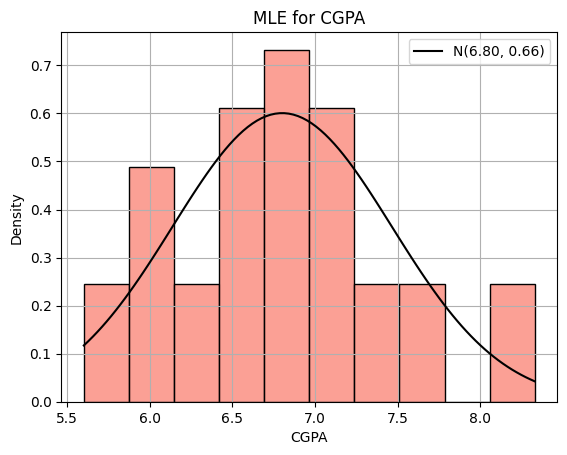

In [21]:
from scipy.stats import norm

sample_data = df['CGPA'].sample(n=30, random_state=42)
mu_mle, std_mle = norm.fit(sample_data)

sns.histplot(sample_data, bins=10, kde=False, color='salmon', stat='density')
x = np.linspace(sample_data.min(), sample_data.max(), 100)
plt.plot(x, norm.pdf(x, mu_mle, std_mle), 'k', label=f'N({mu_mle:.2f}, {std_mle:.2f})')
plt.title('MLE for CGPA')
plt.grid(True)
plt.legend()
plt.show()
